In [18]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

In [19]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [21]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [22]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [23]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

## Test
loss의 수렴 정도를 실험하기 위해서 조절해 본 hyperparameters
- Learning rate : 1. 0.01, 0.0001
- EPOCHS : 100, 1000, 10000

In [24]:
LEARNING_RATES = [1, 0.01, 0.001]
EPOCHS = [100, 1000, 10000]

losses_set = {}
params_set = {}

for i in range(len(EPOCHS)):
    for j in range(len(LEARNING_RATES)):
        # W, b 초기화
        W = np.zeros(X_train.shape[1])
        b = np.random.rand()
        
        # 개별 학습 손실 추적
        losses = []
        
        for k in range(1, EPOCHS[i] + 1):  # EPOCHS[i] 반복
            dW, db = gradient(X_train, W, b, y_train)
            W -= LEARNING_RATES[j] * dW
            b -= LEARNING_RATES[j] * db
            L = loss(X_train, W, b, y_train)
            losses.append(L)
            
            if k % 1000 == 0:
                print(f"EPOCH {EPOCHS[i]}, LR {LEARNING_RATES[j]} - Iteration {k}: Loss {L:.4f}")

        # 최종 손실 저장
        losses_set[f"EPOCHS: {EPOCHS[i]}, LEARNING: {LEARNING_RATES[j]}"] = losses
        # 최종 파라미터 저장
        params_set[f"EPOCHS: {EPOCHS[i]}, LEARNING: {LEARNING_RATES[j]}"] = (W, b)

print("Finish training...")

EPOCH 1000, LR 1 - Iteration 1000: Loss 28888.8320
EPOCH 1000, LR 0.01 - Iteration 1000: Loss 5381.5083
EPOCH 1000, LR 0.001 - Iteration 1000: Loss 6395.7347
EPOCH 10000, LR 1 - Iteration 1000: Loss 28884.2711
EPOCH 10000, LR 1 - Iteration 2000: Loss 31421.8643
EPOCH 10000, LR 1 - Iteration 3000: Loss 34209.1137
EPOCH 10000, LR 1 - Iteration 4000: Loss 37269.6455
EPOCH 10000, LR 1 - Iteration 5000: Loss 40630.1815
EPOCH 10000, LR 1 - Iteration 6000: Loss 44320.0658
EPOCH 10000, LR 1 - Iteration 7000: Loss 48371.5182
EPOCH 10000, LR 1 - Iteration 8000: Loss 52819.9153
EPOCH 10000, LR 1 - Iteration 9000: Loss 57704.0994
EPOCH 10000, LR 1 - Iteration 10000: Loss 63066.7176
EPOCH 10000, LR 0.01 - Iteration 1000: Loss 5381.5025
EPOCH 10000, LR 0.01 - Iteration 2000: Loss 4895.8778
EPOCH 10000, LR 0.01 - Iteration 3000: Loss 4532.9278
EPOCH 10000, LR 0.01 - Iteration 4000: Loss 4258.0643
EPOCH 10000, LR 0.01 - Iteration 5000: Loss 4046.8651
EPOCH 10000, LR 0.01 - Iteration 6000: Loss 3882.04

In [25]:
print(losses_set.keys())
print(params_set)

dict_keys(['EPOCHS: 100, LEARNING: 1', 'EPOCHS: 100, LEARNING: 0.01', 'EPOCHS: 100, LEARNING: 0.001', 'EPOCHS: 1000, LEARNING: 1', 'EPOCHS: 1000, LEARNING: 0.01', 'EPOCHS: 1000, LEARNING: 0.001', 'EPOCHS: 10000, LEARNING: 1', 'EPOCHS: 10000, LEARNING: 0.01', 'EPOCHS: 10000, LEARNING: 0.001'])
{'EPOCHS: 100, LEARNING: 1': (array([  61.18477157,  -39.10947174,  264.99386576,  193.02232203,
         20.41444532,    0.75070259, -156.36899227,  139.15825626,
        217.24355949,  125.28184043]), -1.8318126839741353), 'EPOCHS: 100, LEARNING: 0.01': (array([ 1.54876521,  0.13111072,  4.61597633,  3.43422207,  1.41480669,
        1.0877399 , -2.96012687,  3.26454511,  4.18630647,  3.13957226]), 133.95659171204534), 'EPOCHS: 100, LEARNING: 0.001': (array([ 0.17095689,  0.0181129 ,  0.49789683,  0.36428119,  0.15161375,
        0.11139674, -0.30669517,  0.34186433,  0.44668952,  0.36356349]), 28.71302122758196), 'EPOCHS: 1000, LEARNING: 1': (array([  50.88797178, -233.95739321,  541.82354168,  

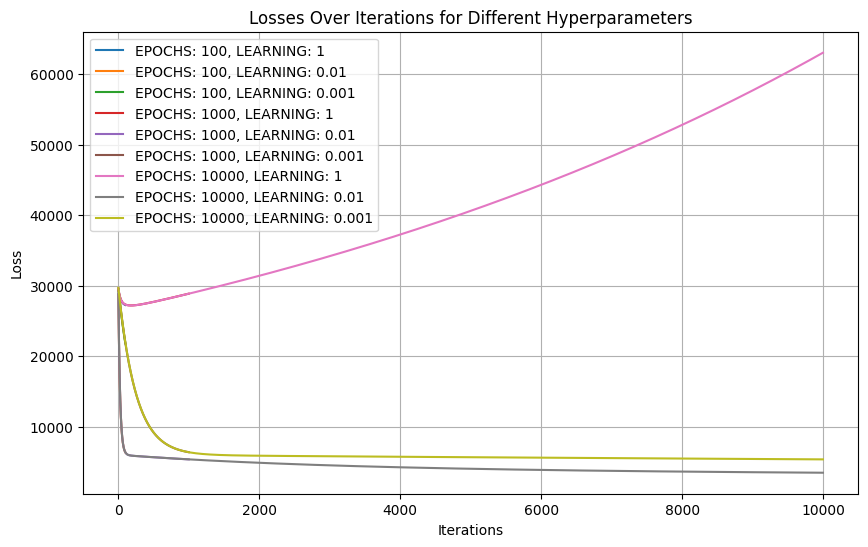

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for key, losses in losses_set.items():
    plt.plot(losses, label=key)

plt.title("Losses Over Iterations for Different Hyperparameters")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

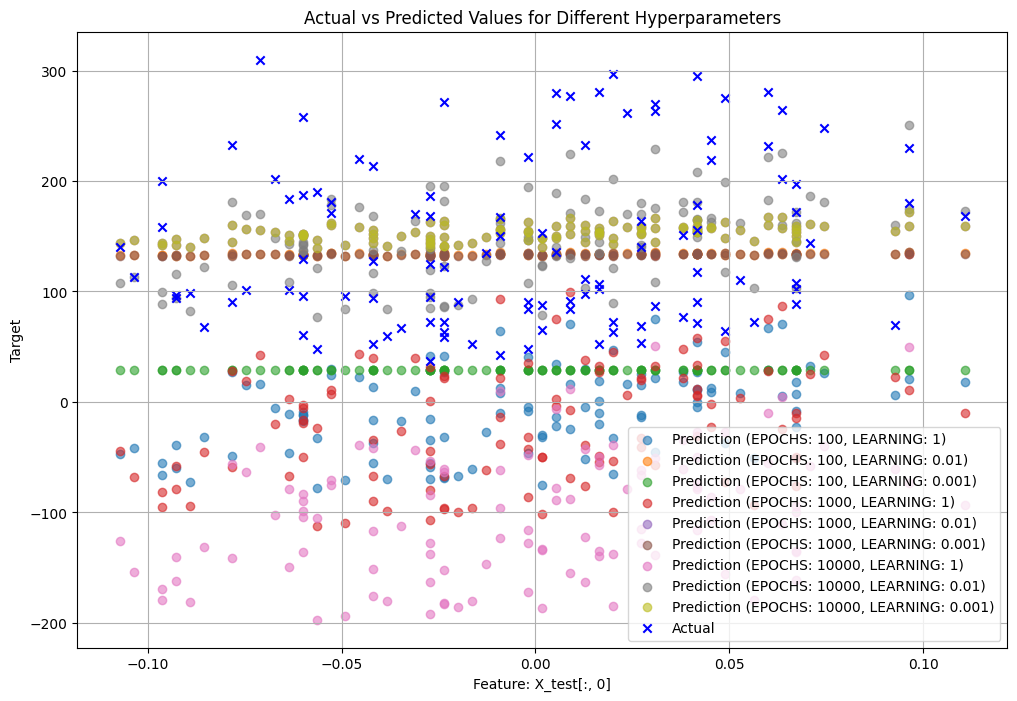

In [27]:
plt.figure(figsize=(12, 8))
    
for key, (W, b) in params_set.items():
    prediction = model(X_test, W, b)  # 예측값 계산
    plt.scatter(X_test[:, 0], prediction, label=f"Prediction ({key})", alpha=0.6)

# 실제값 추가
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual', marker='x')

# 그래프 설정
plt.title("Actual vs Predicted Values for Different Hyperparameters")
plt.xlabel("Feature: X_test[:, 0]")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()